In [1]:
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [2]:
df_bajas = pd.read_feather('../../../data/processed/BAJAS_X_CIF_ID.feather')

/home/voolkia/anaconda3/envs/test/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


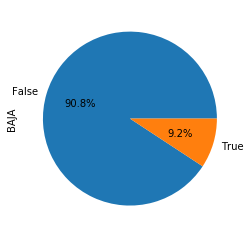

In [4]:
df_bajas["BAJA"].value_counts().plot.pie(autopct='%1.1f%%')

##  BAJAS con CLIENTES 

In [3]:
df_clientes = pd.read_feather('../../../data/interim/clientes.feather')

In [4]:
len(df_bajas)

1001804

In [5]:
len(df_clientes)

11650636

In [6]:
df_clientes.head()

,ID,ORIGEN,SEXO,TIPO_PERSONA,CLIENTE,ANO_DE_NACIMIENTO,FECHA_NACIMIENTO,ESTADO_CIVIL,DATECO_TRABAJA,DATECO_AUTONOMO,DATECO_RAZON_SOCIAL_EMPLEADOR,DATMAR_COMPLETO_ESTUDIOS,DATMAR_NIVEL_EDUCACION,POSICION_IVA
0,781234,083,F,F,None,1929.0,05/05/1929,Soltero,None,None,AMES JOSE FERNANDO .,S,SECUNDARIO,5.0
1,9089921,083,F,F,None,1990.0,20/11/1990,Soltero,None,None,None,None,None,5.0
2,781235,083,M,F,None,1953.0,13/03/1953,Casado,None,None,None,None,None,5.0
3,9089922,083,M,F,None,1957.0,06/05/1957,Casado,None,None,None,None,None,5.0
4,9089923,083,M,F,None,1984.0,09/06/1984,Soltero,None,None,None,None,None,5.0


In [7]:
df_clientes.rename(columns={"ID": "CIF_ID"}, inplace=True)

In [10]:
len(set(df_clientes["CIF_ID"].unique()).intersection(set(df_bajas["CIF_ID"]))) 

989922

In [12]:
len(set(df_clientes["CIF_ID"].unique()).intersection(set(df_bajas["CIF_ID"]))) / len(df_bajas) * 100

98.81393965286624

In [14]:
df_clientes[df_clientes["CIF_ID"].isin(df_bajas["CIF_ID"])]["CLIENTE"].value_counts(dropna=False)

N      703526
NaN    246208
S       40188
Name: CLIENTE, dtype: int64